# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 17 
# Machine Learning Pipeline and saving model

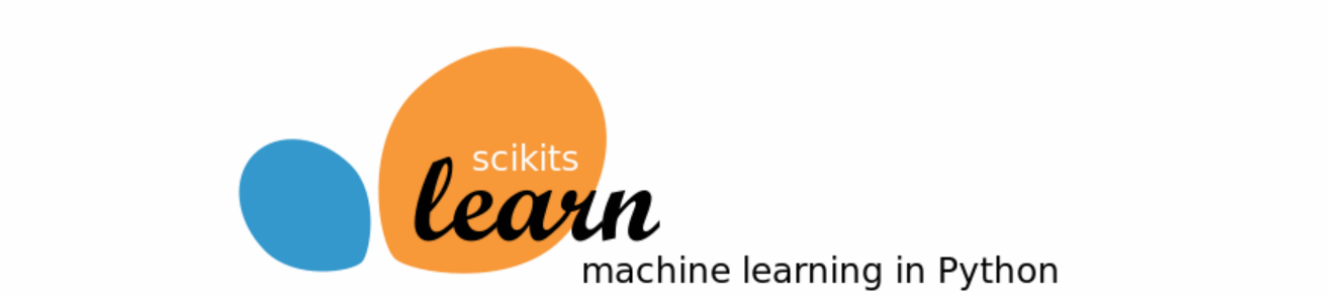

# 1. What is Machine Learning Pipeline?

###### Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. 

Real world data is messy and you required series of preprocessing steps to prepare your dataset to train your machine learnig model. 
- When the aim is to build an end-end machine learning project for production purposes, before passing new data to model, it’s required to preprocess the data first and it’s too hectic work to write all the preprocessing steps again


- to make the preprocessing steps easier and smooth Machine Learning contain a concept of Pipelining in which you can perform all the preprocessing steps step by step in a single chain.

Machine learning pipelines are a mechanism that chains multiple steps together so that the output of each step is used as input to the next step.

# 2. What is Transformer in ML Pipeline?

- ColumnTransformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data


- To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation


- Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator


- The most common tool is a Pipeline class


- Pipeline can be used to chain multiple estimators into one

#### Pipeline serves Multiple purpose 

- Convenience and encapsulation: You only have to call fit and predict once on your data to fit a whole sequence of estimators.


- Joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once


- Safety: Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors

# Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Loading Data

In [18]:
# Step 1 : Read the data from the CSV
df = pd.read_csv('train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [19]:
#Let's look at the data type

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
#Let's take a look at the missing values
#Generate the summary
print('Missing Values \n', df.isna().sum())

Missing Values 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# Data Engineering


1.   Seperate the features from the label
2.   Handling missing values
3.   Handle the Categorical and Numeric data sepearately
3.   Normalisation of data, Encode the data, data transformation



In [21]:
# Drop the loan ID
df = df.drop(['Loan_ID'], axis = 1)
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [22]:
#Separate the features from the label
#The label here is the Loan_Status

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(X.head())
print(y.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban  
0    Y
1    N


In [23]:
X.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban

In [24]:
X.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
X.shape

(614, 11)

In [26]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [27]:
X_train.shape

(491, 11)

# Creating Pipeline for the model

In [28]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [29]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [30]:
nominal_cols = ['Gender','Married','Self_Employed']
nominal_index = [X.columns.get_loc(col) for col in nominal_cols]
nominal_index

[0, 1, 4]

In [31]:
ordinal_cols = [col for col in categorical_cols if col not in nominal_cols]

# nominal_index = [X.columns.get_loc(col) for col in nominal_cols]
# nominal_index
ordinal_index = [X.columns.get_loc(col) for col in ordinal_cols]
ordinal_index

[2, 3, 10]

In [32]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[5, 6, 7, 8, 9]

In [33]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[0, 1, 2, 3, 4, 10]

###### `class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

`steps = list of (name,transform) tuple `

In [61]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )

#Building the Categorical Transformation Pipeline
nominal_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

#Building the Categorical Transformation Pipeline
ordinal_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('oe',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan))
])

`class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)`

`transformers: List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.`



In [62]:
#Combine the numeric and categorical transformers
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('nominal',nominal_transformer,nominal_index),
                ('ordinal',ordinal_transformer,ordinal_index)]
)

In [63]:
#Create the estimator for training
from sklearn.tree import DecisionTreeClassifier

#Create the model

dtmodel = DecisionTreeClassifier()

In [66]:
#Assemble the individual blocks to form the main pipeline
testmodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('classifier'  , dtmodel)  #Model
    ]
)

# Train the model

In [71]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
testmodel.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 7, 8, 9]),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 4]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  [2, 3, 10])])),
                ('classifier', DecisionTreeClassifier())])

# Validation and Evaluation of model

In [70]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [71]:
y_pred = main_pipeline.predict(x_test)
print(y_pred)

['Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']


Report : 
              precision    recall  f1-score   support

           Y       0.59      0.56      0.58        39
           N       0.80      0.82      0.81        84

    accuracy                           0.74       123
   macro avg       0.70      0.69      0.70       123
weighted avg       0.74      0.74      0.74       123



<AxesSubplot:>

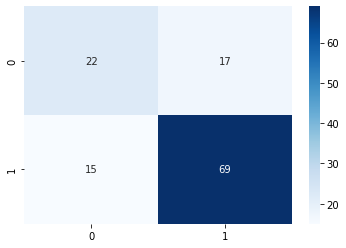

In [72]:
#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

# Saving Model

After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain

In [68]:
#Save Model using pickle
import pickle
pickle.dump(testmodel, open("testmodel.pkl","wb"))

In [74]:
#load pickle model
model = pickle.load(open("loanmodel.pkl","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 7, 8, 9]),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 4]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder())]),
                                                  [2, 3, 10])])),
                ('classifier', DecisionTreeClassifier())])

In [75]:
model.predict(x_test)

array(['Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [76]:
#save Model with sklearn joblib
from joblib import load, dump
dump(main_pipeline,'loanmodeljob.joblib')

['loanmodeljob.joblib']

In [77]:
model = load('loanmodeljob.joblib')
model.predict(x_test)

array(['Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [78]:
type(x_test)

pandas.core.frame.DataFrame

In [79]:
sample = [['Male','Yes','0','Graduate','No',5498,250.0,128.0,360,1,'Urban']]
sample

[['Male', 'Yes', '0', 'Graduate', 'No', 5498, 250.0, 128.0, 360, 1, 'Urban']]

In [80]:
model.predict(sample)

array(['Y'], dtype=object)

Note: If your specify columns name in Transformer, then you must specify column names (pass pandas dataframe) 
when you make prediction. If you specify columns index, then you need not have to specify columns name when you make prediction